In [19]:
!pip install feature_engine

   ---------------------------------------- 0.0/375.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/375.0 kB ? eta -:--:--
   --- ----------------------------------- 30.7/375.0 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 81.9/375.0 kB 657.6 kB/s eta 0:00:01
   ------------ ------------------------- 122.9/375.0 kB 798.9 kB/s eta 0:00:01
   ------------------------ --------------- 225.3/375.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 375.0/375.0 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --------------------------- ------------ 204.8/301.8 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [23]:
!pip install mlflow

   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/27.4 MB 1.3 MB/s eta 0:00:21
   ---------------------------------------- 0.1/27.4 MB 980.4 kB/s eta 0:00:28
   ---------------------------------------- 0.1/27.4 MB 1.0 MB/s eta 0:00:27
   ---------------------------------------- 0.1/27.4 MB 871.5 kB/s eta 0:00:32
   ---------------------------------------- 0.2/27.4 MB 701.4 kB/s eta 0:00:39
   ---------------------------------------- 0.2/27.4 MB 831.5 kB/s eta 0:00:33
   ---------------------------------------- 0.2/27.4 MB 769.9 kB/s eta 0:00:36
   ---------------------------------------- 0.3/27.4 MB 744.2 kB/s eta 0:00:37
   ---------------------------------------- 0.3/27.4 MB 737.3 kB/s eta 0:00:37
   ---------------------------------------- 0.3/27.4 MB 756.6 kB/s eta 0:00:36
    

In [25]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import(
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder)

from feature_engine.encoding import CountFrequencyEncoder

from feature_engine.outliers import Winsorizer

import mlflow

from sklearn.metrics import (
     accuracy_score,
     precision_score,
     recall_score,
     f1_score
)

In [27]:
## load the data
df=pd.read_csv("C:/Users/chandra.kallimath/Documents/Personal/ML_concepts_Nitish/train.csv")

In [29]:
df.shape

(891, 12)

In [31]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


drop  Name
encode Sex


In [33]:
## check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
## drop the not required columns
drop_columns=["passengerid","ticket","cabin","name"]

In [50]:
## write a function to clean the data

def clean_data(df):
    return(df
           .rename(columns=str.lower)
           .drop(columns=drop_columns)
           .assign(family=lambda x:x['sibsp']+x['parch'])
           .drop(columns=['sibsp','parch']))
              

The .assign() method in pandas is used to create a new column (or overwrite an existing one) in the DataFrame. In this case, a new column named family is being created.

In [52]:
final_df=clean_data(df)

In [54]:
final_df.sample(2)

,survived,pclass,sex,age,fare,embarked,family
413,0,2,male,NaN,0.0000,S,0
830,1,3,female,15.0,14.4542,C,1


In [56]:
final_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'embarked', 'family'], dtype='object')

In [62]:
final_df.loc[:,'survived'].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

when we write normalize=True it will retain the % of values instead of counts of observations

## create function to create a Box plot of the numeric features

In [66]:
def create_boxplot(data,column_name,hue=None):
    sns.boxplot(data=data,y=column_name,hue=hue)


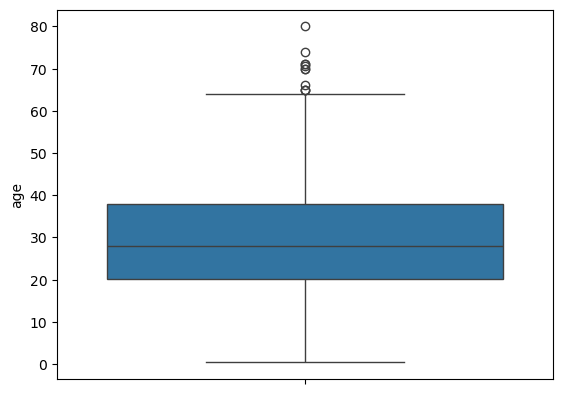

In [68]:
## box plot of age column
create_boxplot(final_df,'age')

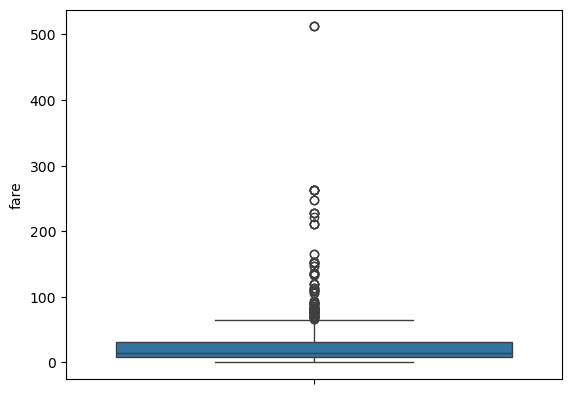

In [70]:
## box plot of age column
create_boxplot(final_df,'fare')

## Check the distribution of categorical variables 

In [73]:
def plot_distribution(data,column_name):
    sns.countplot(data=data,x=column_name)


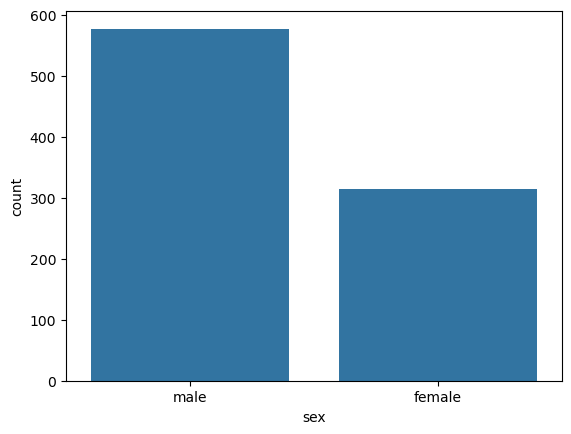

In [77]:
## distribution for sex
plot_distribution(final_df,'sex')

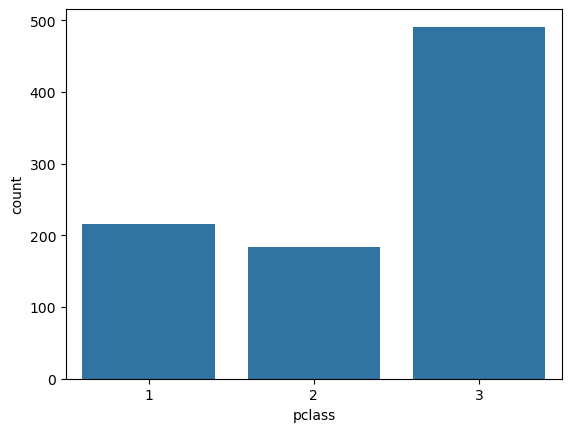

In [79]:
## distribution for sex
plot_distribution(final_df,'pclass')

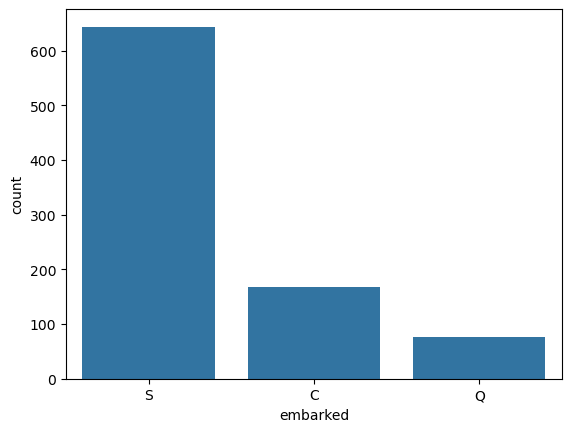

In [81]:
## distribution for sex
plot_distribution(final_df,'embarked')

## Observation 

* imbalanced data
* target is already encoded
* missing value treatement for age
* outlier treatement for age
* scallingof age
* outlier treatemnt for fare
* scalling of fare variable
* onehot encoding for sex
* missing value treatemnet for embarked with  help of mode values
* onehot encoding for embarked

In [85]:
x=final_df.drop(columns=['survived'])
y=final_df['survived']


In [87]:
## do train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
x.head()

,pclass,sex,age,fare,embarked,family
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


## Pipeline for indiviual Columns

for multiple sequential steps we do apply pipeline example for age coloumn missing value imputation, outlier treatement etc

In [99]:
## age_pipeline
age_pipe=Pipeline(steps=[
                  ('impute',SimpleImputer(strategy='median')),
                  ('outliers',Winsorizer(capping_method='gaussian',fold=3)), ## data points which are greater than 3sd (3sigma) cap those values
                  ('scale',StandardScaler())
])
age_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())])

In [103]:
## fare_pipeline
fare_pipe=Pipeline(steps=[('outliers',Winsorizer(capping_method='iqr',fold=1.5)),
                   ('scale',StandardScaler())
                   ])

In [106]:
## embarked_pipeline
embark_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('count_encode',CountFrequencyEncoder(encoding_method='count')),
                            ('scale',MinMaxScaler())

    
])
embark_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('count_encode', CountFrequencyEncoder()),
                ('scale', MinMaxScaler())])

CountFrequencyEncoder -here it will count the number of times the  category has occured in data set and instead of creating dummy varible it will replace count value  to that respective category example S-525, c-125,Q-60 wherver s occurs it will replace with 525

In [108]:
x_train.loc[:,'embarked'].value_counts()

embarked
S    525
C    125
Q     60
Name: count, dtype: int64

## Column transformer

In [ ]:
set_config(transform_output='pandas')

The command set_config(transform_output='pandas') is used in Scikit-learn to modify the default behavior of transformers when transforming data. Specifically, it ensures that the output of transformers is a Pandas DataFrame instead of a NumPy array.

In [133]:
## make coloumn transformer
preprocessor=ColumnTransformer(transformers=[
    ('age',age_pipe,['age']),
    ('fare',fare_pipe,['fare']),
    ('embarked',embark_pipe,['embarked']),
    ('sex',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['sex']), ## tree based models multicolinearity will not impact
    
    ('family',MinMaxScaler(),['family'])    
],remainder='passthrough',n_jobs=1)

preprocessor

ColumnTransformer(n_jobs=1, remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('outliers',
                                                  Winsorizer(fold=3)),
                                                 ('scale', StandardScaler())]),
                                 ['age']),
                                ('fare',
                                 Pipeline(steps=[('outliers',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5)),
                                                 ('scale', StandardScaler())]),
                                 ['fare']),
                                ('embarked',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('count_encode',
                                                  CountFrequencyEncoder()),
                                                 ('scale', MinMaxScaler())]),
                                 ['embarked']),
                                ('sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sex']),
                                ('family', MinMaxScaler(), ['family'])])

In [137]:
#fit and transform the training data
preprocessor.fit_transform(x_train)

array([[ 1.26684967,  0.23675094,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.47877719, -0.5323386 ,  1.        , ...,  1.        ,
         0.        ,  2.        ],
       [ 0.21947355, -0.78415341,  1.        , ...,  1.        ,
         0.        ,  3.        ],
       ...,
       [ 0.9177243 , -0.47734622,  1.        , ...,  1.        ,
         0.2       ,  3.        ],
       [-1.17702794,  2.01620087,  1.        , ...,  0.        ,
         0.3       ,  1.        ],
       [-0.63394402,  2.01620087,  1.        , ...,  1.        ,
         0.1       ,  1.        ]])

In [139]:
preprocessor.get_params()

{'n_jobs': 1,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('age',
   Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                   ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
   ['age']),
  ('fare',
   Pipeline(steps=[('outliers', Winsorizer(capping_method='iqr', fold=1.5)),
                   ('scale', StandardScaler())]),
   ['fare']),
  ('embarked',
   Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                   ('count_encode', CountFrequencyEncoder()),
                   ('scale', MinMaxScaler())]),
   ['embarked']),
  ('sex',
   OneHotEncoder(handle_unknown='ignore', sparse_output=False),
   ['sex']),
  ('family', MinMaxScaler(), ['family'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'age': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                 ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
 'fare': 

## Model Pipeline

get and set  parameters are more commanly used in the mlflow

In [143]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [210]:
# build the model pipeline

model_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [214]:
model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',RandomForestClassifier(**model_params))
])

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['fare']...
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('clf',
                 RandomForestClassifier(max_depth=10, max_samples=0.8,
                                        n_jobs=-1, random_state=30))])

In [216]:
# fit the model on the training data

model_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['fare']...
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('clf',
                 RandomForestClassifier(max_depth=10, max_samples=0.8,
                                        n_jobs=-1, random_state=30))])

In [218]:
# evaluate the model on the test data

y_pred = model_pipe.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred).item()
recall = recall_score(y_test,y_pred).item()
f1 = f1_score(y_test,y_pred).item()

In [220]:
# metrics dict

metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

metrics

{'accuracy': 0.8324022346368715,
 'precision': 0.8142857142857143,
 'recall': 0.7702702702702703,
 'f1_score': 0.7916666666666666}

In [161]:
from sklearn.metrics import confusion_matrix

In [165]:
import sklearn
print(sklearn.__version__)

1.4.2


In [222]:
from sklearn.metrics import ConfusionMatrixDisplay

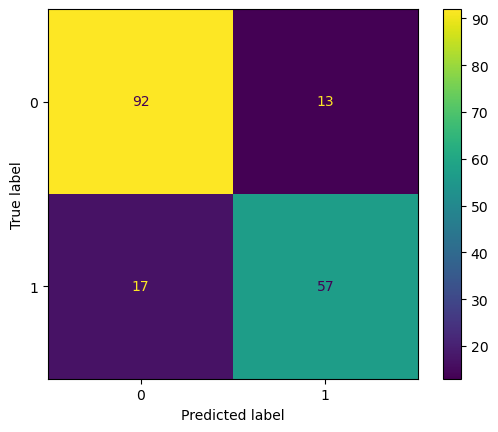

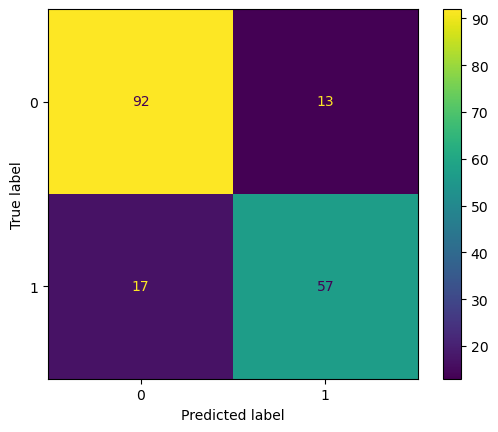

In [224]:
# plot confusion matrix

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
cm.figure_

In [171]:
model_pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=1, remainder='passthrough',
                     transformers=[('age',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='median')),
                                                    ('outliers',
                                                     Winsorizer(fold=3)),
                                                    ('scale', StandardScaler())]),
                                    ['age']),
                                   ('fare',
                                    Pipeline(steps=[('outliers',
                                                     Winsorizer(capping_method='iqr',
                                                                fold=1.5)),
                                                    ('scale', StandardScaler())]),
                                    ['fare']),
                                   (

In [ ]:
X_test.join(y_test)

In [173]:
## check if UI is set or not
mlflow.is_tracking_uri_set()

False

It will return the False as we have not yet the uri

**Run all the mlflow related tracking code in a single cell**

In [183]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [185]:
## check if UI is set or not
mlflow.is_tracking_uri_set()

True

## Run all the mlflow related tracking code in a single cell**


In [230]:
## set uri server
mlflow.set_tracking_uri("http://127.0.0.1:5000")


## set the expierement name
mlflow.set_experiment("Titanic Data")


## mlflow logging starts from here

with mlflow.start_run(run_name="Fourth run") as run:
     # track the input signature
    signature=mlflow.models.infer_signature(model_input=x_train,
                                         model_output=model_pipe.predict(x_train))
    # log parameters
    mlflow.log_params(model_pipe.get_params()) ## here considering model pipe which is after all preprocessing and built the model

    ## log the metrics
    mlflow.log_metrics(metrics) ## give the name of dictionary where you have stored all the metrics

    ## log the model
    mlflow.sklearn.log_model(sk_model=model_pipe,artifact_path='model',signature=signature)

    ## log the confusion metrix
    mlflow.log_figure(figure=cm.figure_,artifact_file="confusion_matrix.png")



C:\Users\chandra.kallimath\AppData\Local\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Fourth run at: http://127.0.0.1:5000/#/experiments/306457315467402939/runs/7ab0c67205914d89865007fc577b4666
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/306457315467402939


In [ ]:
# set the uri for server

mlflow.set_tracking_uri("http://127.0.0.1:8080")

mlflow.set_experiment("Mentos Zindagi")

with mlflow.start_run() as run:
    # log the data signature
    data_signature = mlflow.models.infer_signature(model_input=X_train,model_output=model_pipe.predict(X_train))

    # log preprocessor parameters
    mlflow.log_params(model_pipe.get_params())

    # log model metrics
    mlflow.log_metrics(metrics)
    
    # log the model
    mlflow.sklearn.log_model(sk_model=model_pipe,artifact_path="model.pkl",signature=data_signature)

    # Get the model uri
    model_uri = mlflow.get_artifact_uri("model.pkl")
    
    # # evaluate the model
    # evaluations = mlflow.models.evaluate(model=model_uri,
    #                        data=X_test.join(y_test),
    #                        targets='survived',
    #                        model_type="classifier")

    # log the confusion matrix
    mlflow.log_figure(cm.figure_,artifact_file='confusion_matrix.png')